In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np
import rawpy
import imutils
from PIL import Image

import matplotlib.pyplot as plt

from photo.film import detect, show, crop, rotate, save

Image.MAX_IMAGE_PIXELS = None

# To dos
- Transform coordinates on subsampled image, rather than compute on full image


In [3]:
path = "/Users/dsuo/Downloads/2021-01-31-0001.tif"
fmt = "6x6"

DPI = 2400
working_dpi = 400
scaling = DPI // working_dpi

In [4]:
image = Image.open(path)
raw = np.array(image)
# raw = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
# with rawpy.imread(path) as raw:
#     raw = raw.postprocess()

In [5]:
raw.shape

(20433, 19200, 3)

In [6]:
im = raw[::scaling, ::scaling, :]

In [7]:
im.shape

(3406, 3200, 3)

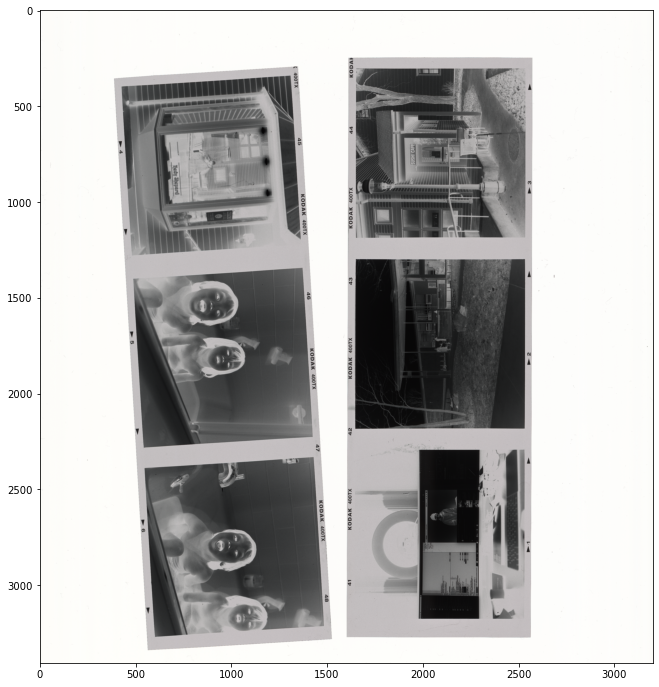

In [8]:
plt.figure(figsize=(16, 12))
plt.imshow(im)

Target width: 960.63, Target aspect ratio: 1.00
3405.0 3199.0
3027.70751953125 963.4033203125
963.40326
0.19023193731301724
-89.80976806268698
964.7669677734375 2996.48876953125
964.767
3.3896190809132327
-86.61038091908677


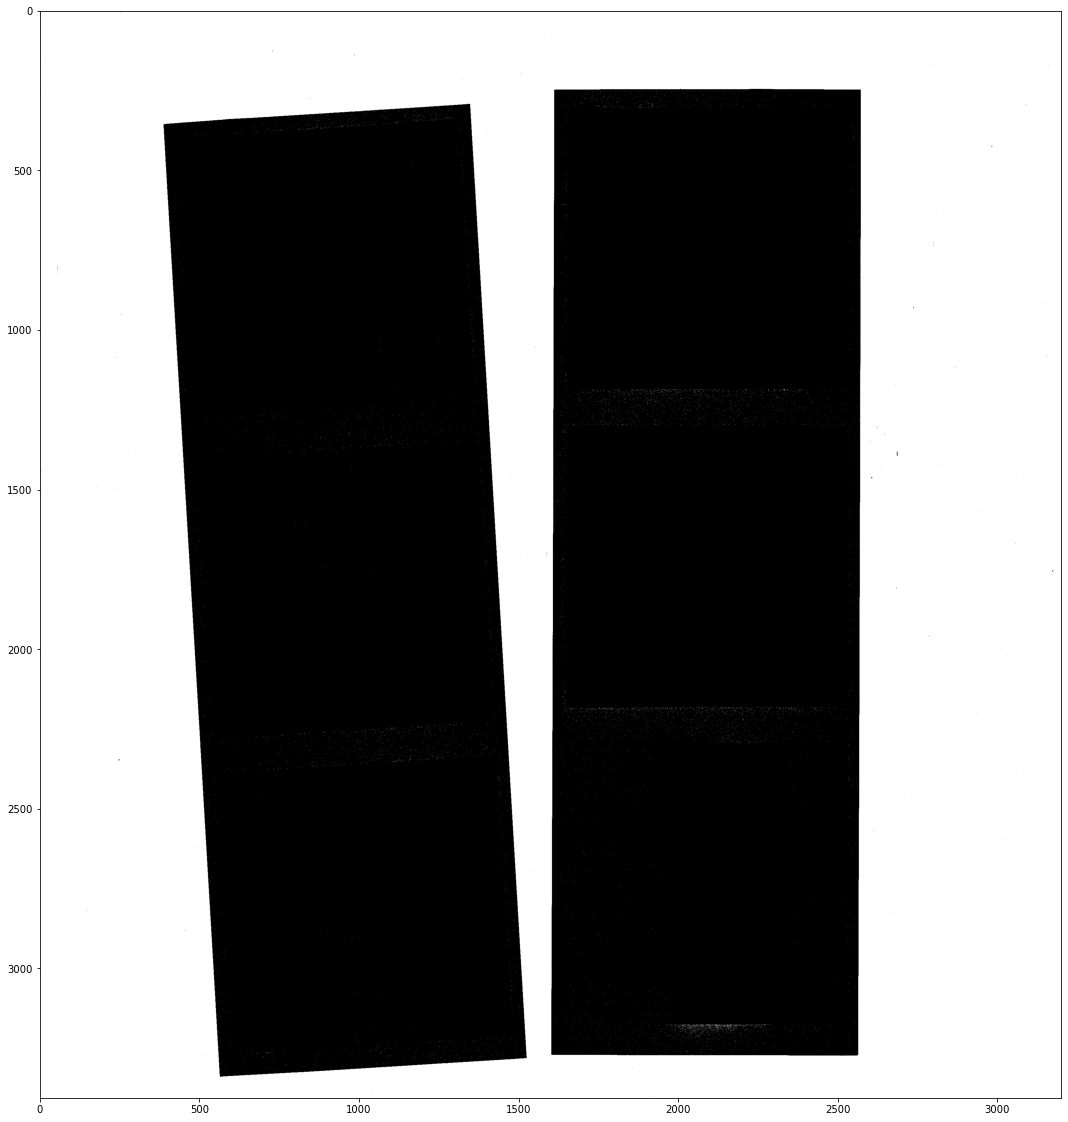

In [9]:
paths, rotations = detect(im,
                          fmt=fmt,
                          threshold=200,
                          dpi=working_dpi,
                          verbose=True,
                          use_tqdm=True
                         )

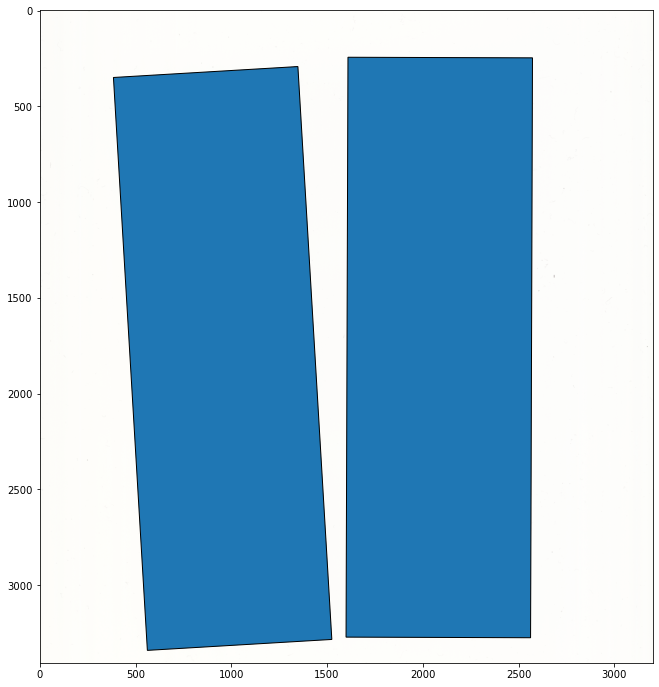

In [10]:
show(im, paths)

In [16]:
# cropped = crop(raw, [path * scaling for path in paths], dpi=DPI)
cropped = crop(im, paths, dpi=working_dpi)

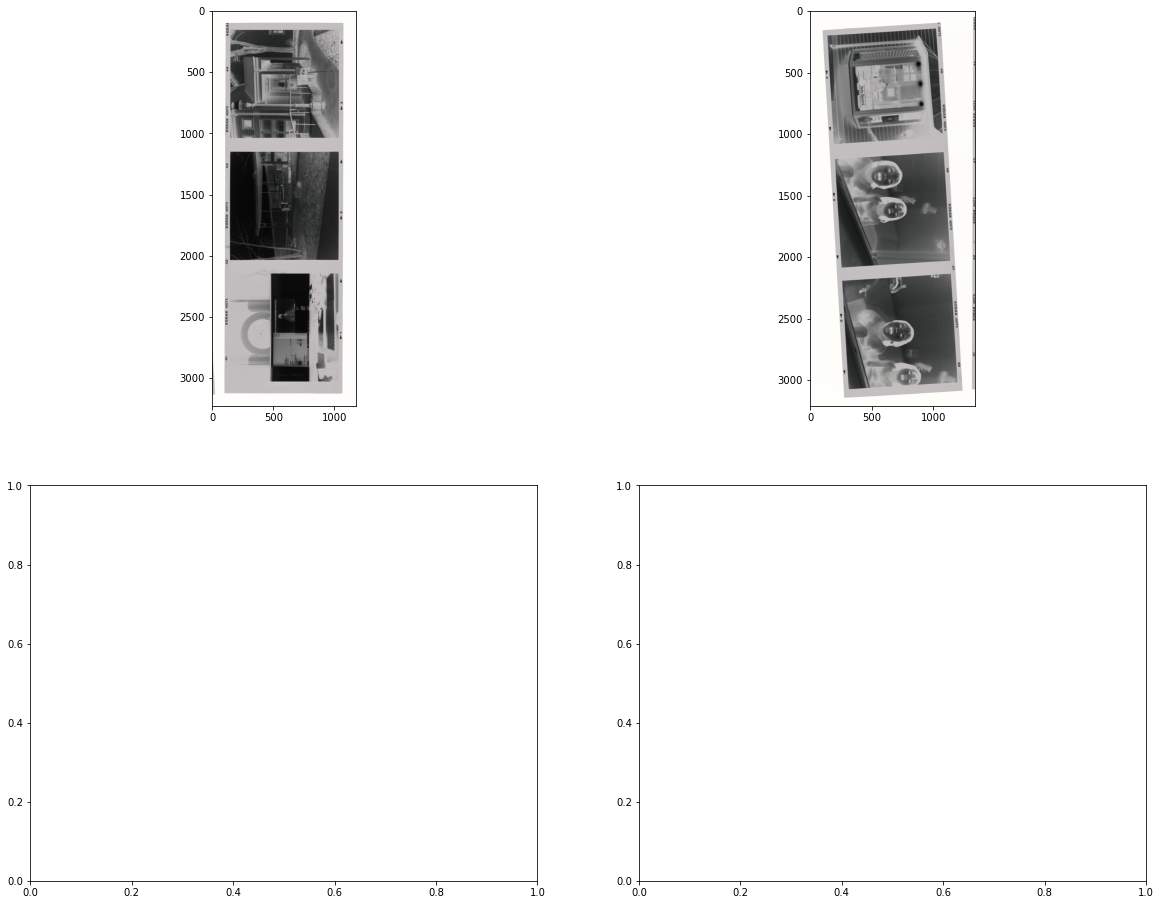

In [17]:
fig, axs = plt.subplots(len(cropped) // 2 + 1, 2, figsize=(20, 16))

for i, preview in enumerate(cropped):
    axs[i // 2, i % 2].imshow(preview, cmap="gray")

In [18]:
rotated = rotate(cropped, rotations)

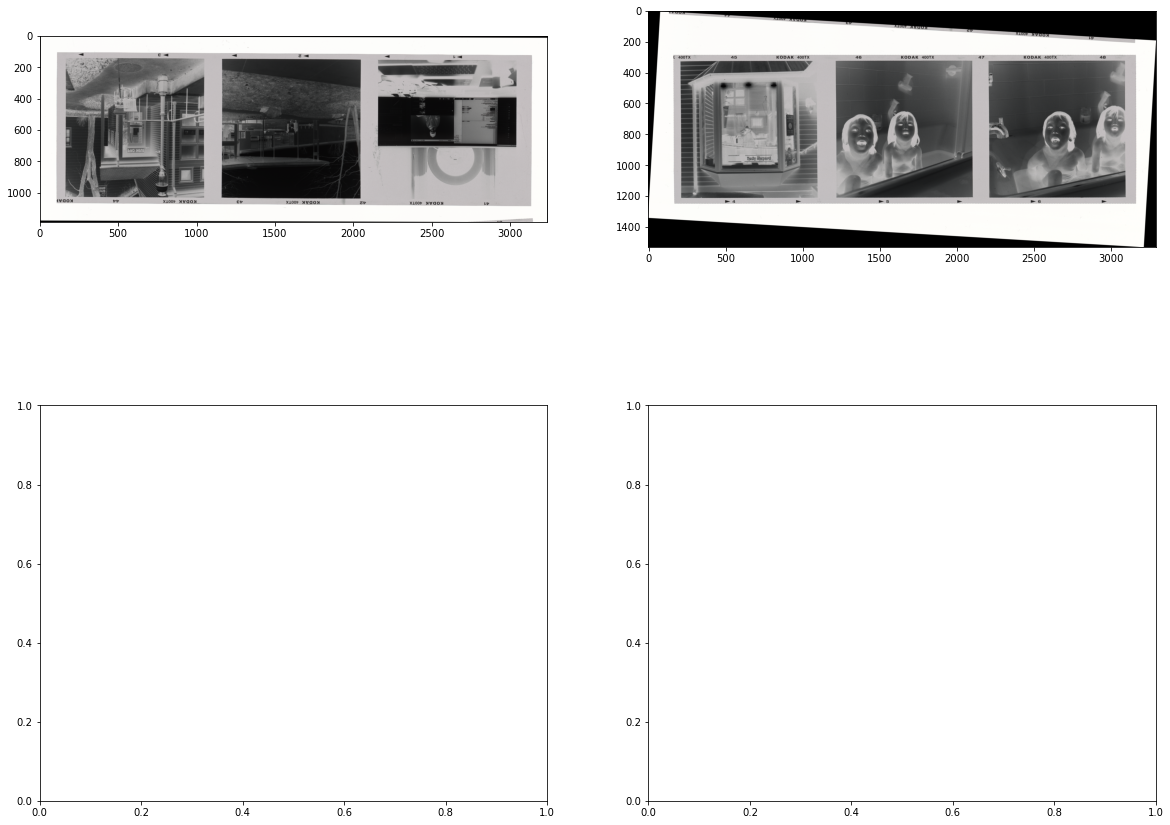

In [19]:
fig, axs = plt.subplots(len(rotated) // 2 + 1, 2, figsize=(20, 16))

for i, preview in enumerate(rotated):
    axs[i // 2, i % 2].imshow(preview, cmap="gray")

Target width: 960.63, Target aspect ratio: 1.00
1173.3743896484375 3231.409423828125
962.4506225585938 3027.742919921875
3027.7432
0.3278285339065292
0.3278285339065292
Target width: 960.63, Target aspect ratio: 1.00
1340.3892822265625 3213.355224609375
2996.0 964.0
2996.0
0.0
0.0


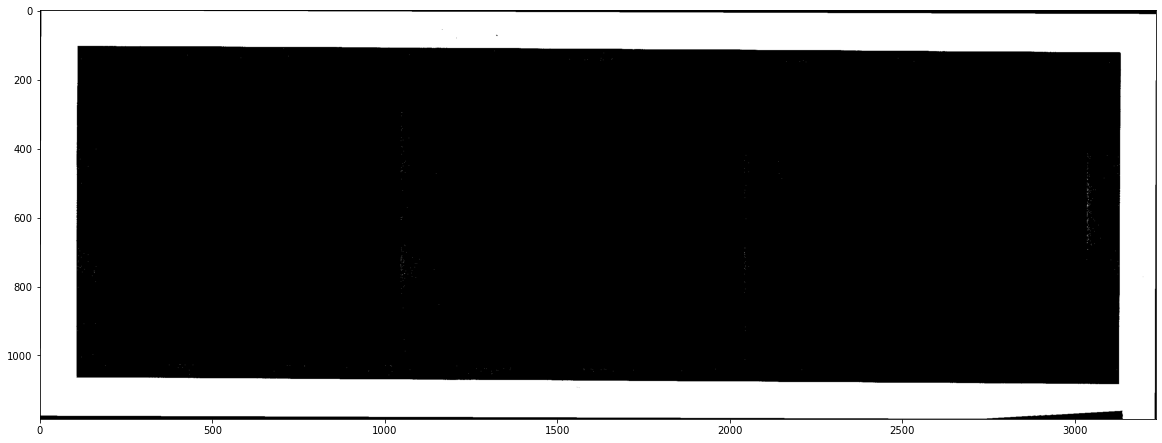

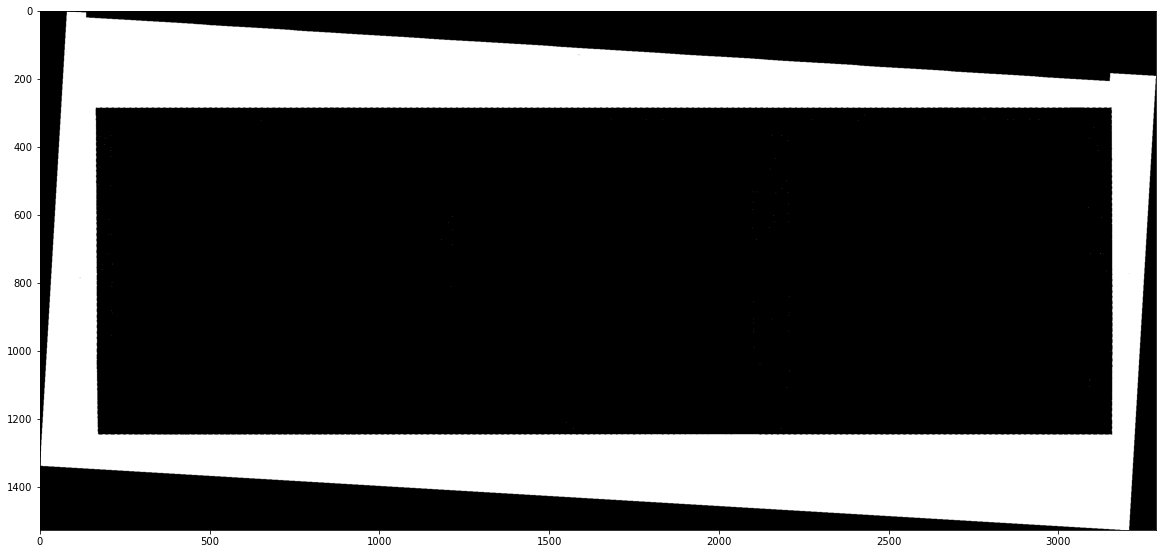

In [20]:
strips = []
for rotated_im in rotated:
    p, r = detect(rotated_im,
                          fmt=fmt,
                          threshold=200,
                          dpi=working_dpi,
                          verbose=True,
                          use_tqdm=True
                         )
    strips.append(crop(rotated_im, p, pad=0.0, dpi=working_dpi)[0])

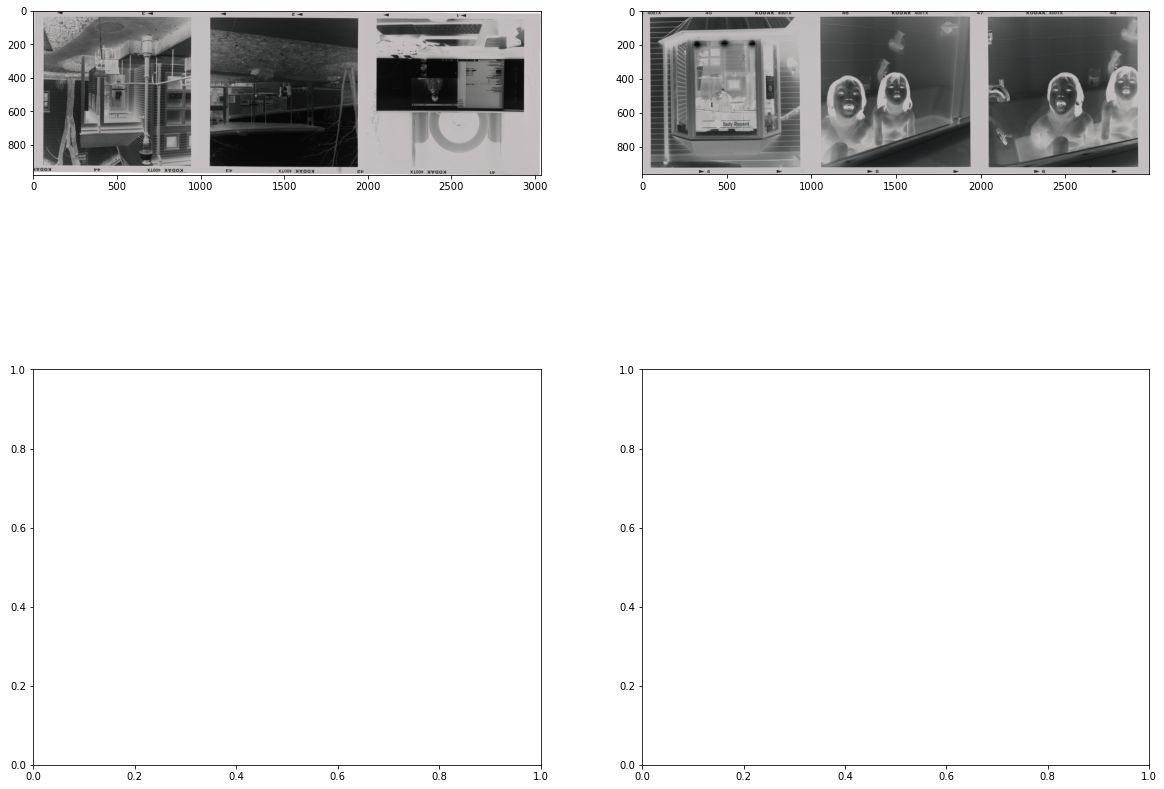

In [21]:
fig, axs = plt.subplots(len(strips) // 2 + 1, 2, figsize=(20, 16))

for i, strip in enumerate(strips):
    axs[i // 2, i % 2].imshow(strip, cmap="gray")

In [25]:
bw = cv2.cvtColor(strips[0], cv2.COLOR_BGR2GRAY)
ret, threshed = cv2.threshold(bw, 50, 255, cv2.THRESH_BINARY)

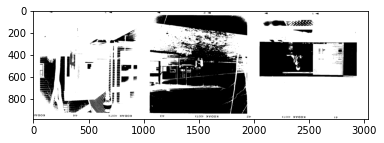

In [26]:
plt.imshow(threshed, cmap="gray")

In [38]:
np.sum(threshed == 255) + np.sum(threshed == 0) == np.prod(threshed.shape)

True

In [40]:
np.sum(threshed, axis=0).shape

(3034,)

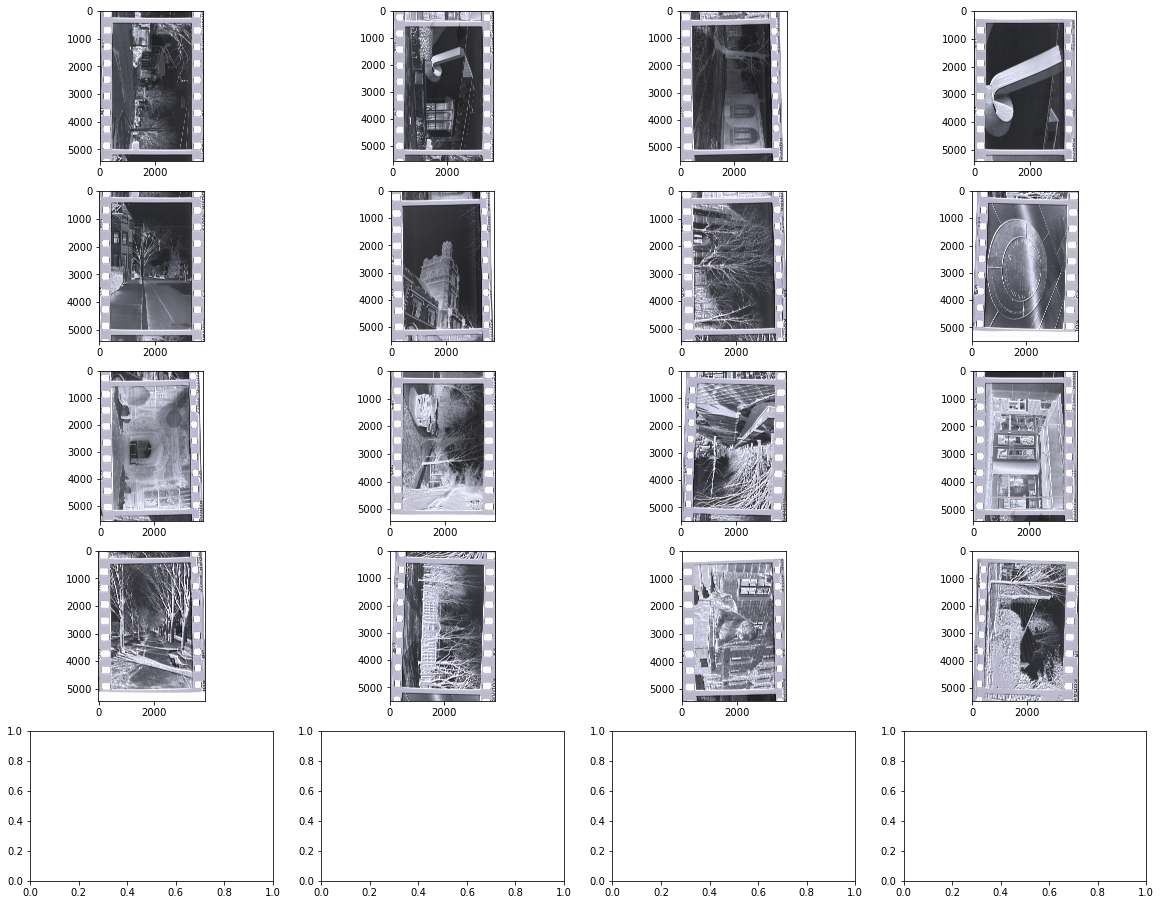

In [356]:
fig, axs = plt.subplots(len(cropped) // 4 + 1, 4, figsize=(20, 16))

for i, preview in enumerate(cropped):
    axs[i // 4, i % 4].imshow(preview, cmap="gray")

In [357]:
rotated = rotate(cropped, rotations)

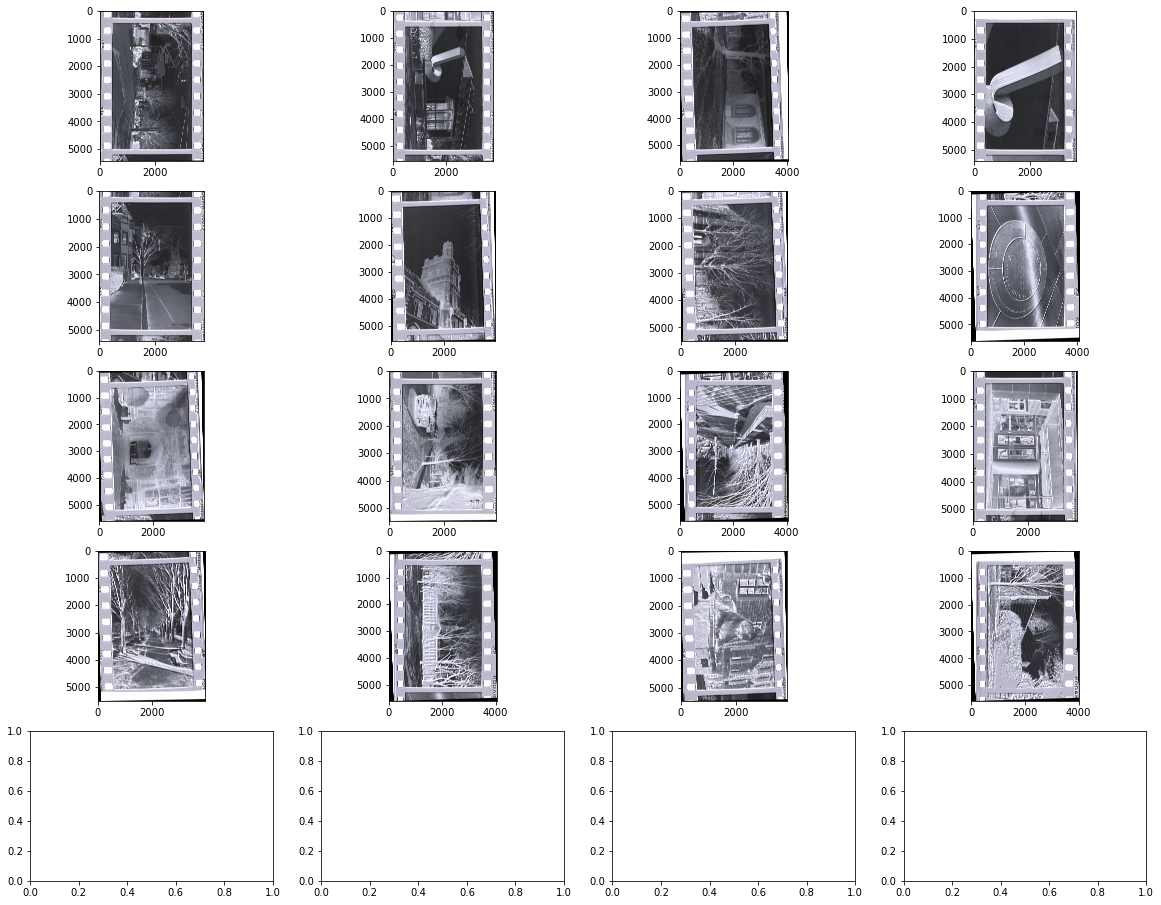

In [358]:
fig, axs = plt.subplots(len(rotated) // 4 + 1, 4, figsize=(20, 16))

for i, preview in enumerate(rotated):
    axs[i // 4, i % 4].imshow(preview, cmap="gray")

In [359]:
finals = []

for preview in rotated:
    p, r = detect(preview,  fmt="35", area_threshold=0.1, dpi=DPI)
    finals.append(crop(preview, p, width=36/25.4, height=24/25.4, pad=0.1, dpi=DPI)[0])

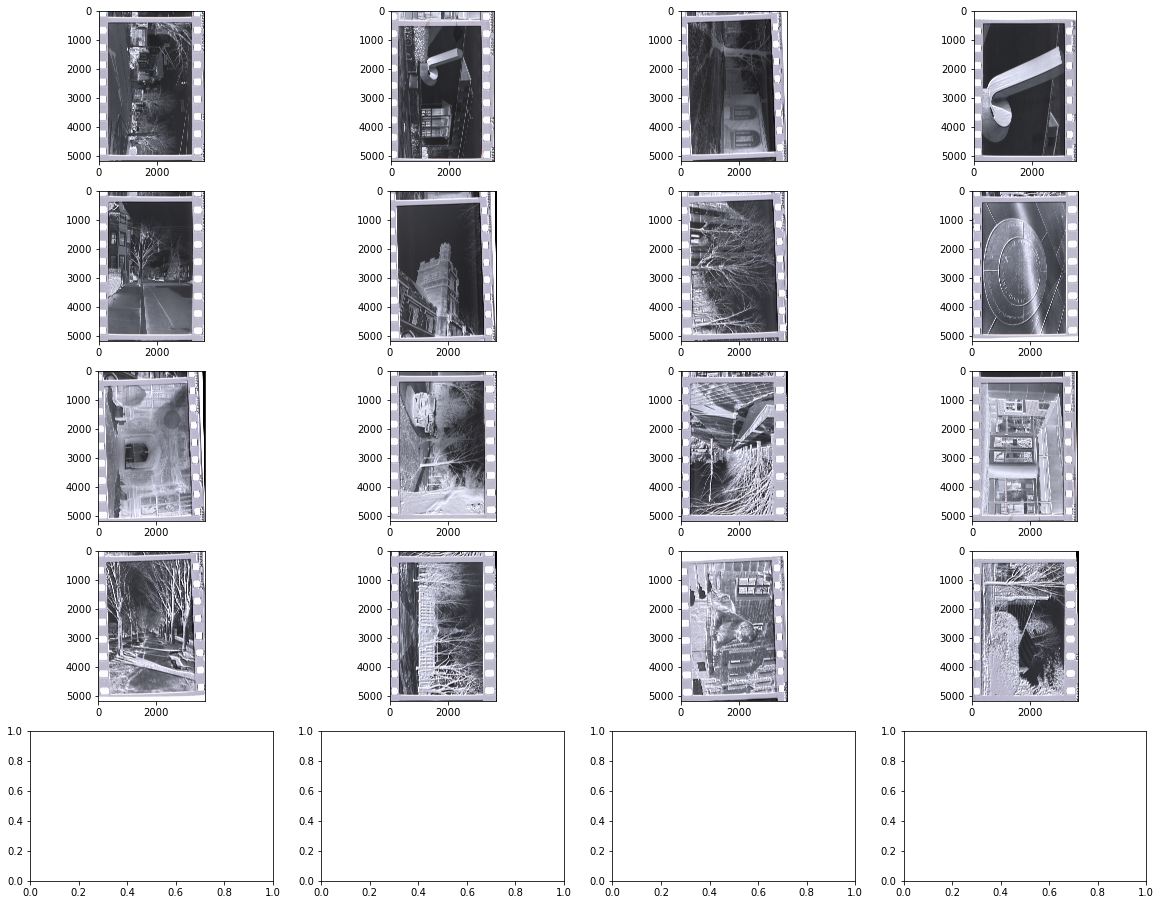

In [360]:
fig, axs = plt.subplots(len(finals) // 4 + 1, 4, figsize=(20, 16))

for i, final in enumerate(finals):
    axs[i // 4, i % 4].imshow(final, cmap="gray")

In [361]:
save(finals, "~/Downloads/test", format="tiff")